In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##PART -A

In [2]:
STUDENT_ID = "PES2UG24CS827"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [3]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG24CS827
Polynomial Type: QUARTIC: y = 0.0118x⁴ + 1.68x³ + 0.18x² + 2.19x + 11.63
Noise Level: ε ~ N(0, 1.78)
Architecture: Input(1) → Hidden(96) → Hidden(96) → Output(1)
Learning Rate: 0.003
Architecture Type: Large Balanced Architecture


# DATASET GENERATION - DO NOT MODIFY

In [4]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [5]:
def relu(z):
    """
    ReLU activation function: f(x) = max(0, x)
    """
    return np.maximum(0, z)

def relu_derivative(z):
    """
    ReLU derivative: f'(x) = 1 if x > 0, else 0
    """
    return (z > 0).astype(float)

# LOSS FUNCTION- TODO: IMPLEMENT

In [6]:
def mse_loss(y_true, y_pred):
    """
    Mean Squared Error: MSE = (1/m) * Σ(y_true - y_pred)^2
    """
    return np.mean((y_true - y_pred) ** 2)

# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

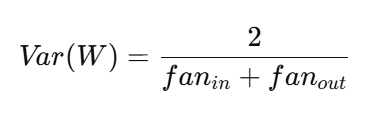


##Two common forms:  

#**Normal distribution:**  
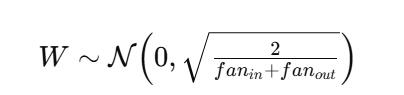

#**Uniform distribution:**  
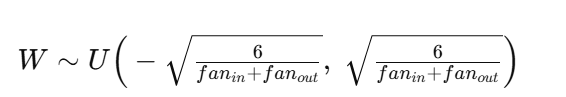

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [7]:
import numpy as np

def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    Xavier initialization: weights ~ N(0, sqrt(2/(fan_in + fan_out)))
    Biases initialized to zeros
    """
    np.random.seed(assignment["student_seed"])

    # Xavier std for each layer
    xavier_std1 = np.sqrt(2 / (input_dim + hidden1))
    xavier_std2 = np.sqrt(2 / (hidden1 + hidden2))
    xavier_std3 = np.sqrt(2 / (hidden2 + output_dim))

    # W1, b1 (input -> hidden1)
    W1 = np.random.randn(input_dim, hidden1) * xavier_std1
    b1 = np.zeros((1, hidden1))

    # W2, b2 (hidden1 -> hidden2)
    W2 = np.random.randn(hidden1, hidden2) * xavier_std2
    b2 = np.zeros((1, hidden2))

    # W3, b3 (hidden2 -> output)
    W3 = np.random.randn(hidden2, output_dim) * xavier_std3
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3


# FORWARD PROPAGATION - TODO: IMPLEMENT

In [8]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    Forward propagation:
    Input → Hidden1(ReLU) → Hidden2(ReLU) → Output(Linear)
    """

    # First hidden layer
    z1 = X @ W1 + b1
    a1 = relu(z1)

    # Second hidden layer
    z2 = a1 @ W2 + b2
    a2 = relu(z2)

    # Output layer (linear, no activation)
    z3 = a2 @ W3 + b3

    return z1, a1, z2, a2, z3


# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [9]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """
    Backpropagation:
    Compute gradients for W1, b1, W2, b2, W3, b3
    """

    m = len(X)  # Batch size

    # ---- Output layer ----
    # dL/dY_pred for MSE loss
    dY_pred = (2 / m) * (Y_pred - Y_true)

    # Gradients for W3, b3
    dW3 = a2.T @ dY_pred
    db3 = np.sum(dY_pred, axis=0, keepdims=True)

    # ---- Second hidden layer ----
    da2 = dY_pred @ W3.T
    dz2 = da2 * relu_derivative(z2)

    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # ---- First hidden layer ----
    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)

    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3


# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [10]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10):
    """
    Training loop with early stopping and loss tracking
    """

    # Initialize weights
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):

        # ---- Forward pass ----
        z1, a1, z2, a2, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)

        # ---- Compute training loss ----
        train_loss = mse_loss(Y_train, Y_pred_train)

        # ---- Backward pass ----
        dW1, db1, dW2, db2, dW3, db3 = backward_pass(
            X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3
        )

        # ---- Gradient descent update ----
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

        # ---- Validation ----
        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)

        # ---- Record losses ----
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Print progress every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")

        # ---- Early stopping check ----
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    return best_weights, train_losses, test_losses


# EXECUTE TRAINING

In [11]:
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 96 → 96 → 1
Learning Rate: 0.003
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 0.892146, Test Loss = 0.894641
Epoch  40: Train Loss = 0.769437, Test Loss = 0.772948
Epoch  60: Train Loss = 0.676483, Test Loss = 0.680506
Epoch  80: Train Loss = 0.603200, Test Loss = 0.607286
Epoch 100: Train Loss = 0.541609, Test Loss = 0.545507
Epoch 120: Train Loss = 0.488073, Test Loss = 0.491795
Epoch 140: Train Loss = 0.442302, Test Loss = 0.445818
Epoch 160: Train Loss = 0.403197, Test Loss = 0.406552
Epoch 180: Train Loss = 0.370707, Test Loss = 0.373905
Epoch 200: Train Loss = 0.343810, Test Loss = 0.346838
Epoch 220: Train Loss = 0.321456, Test Loss = 0.324310
Epoch 240: Train Loss = 0.302891, Test Loss = 0.305576
Epoch 260: Train Loss = 0.287371, Test Loss = 0.289885
Epoch 280: Train Loss = 0.274235, Test Loss = 0.276581
Ep

# RESULTS VISUALIZATION

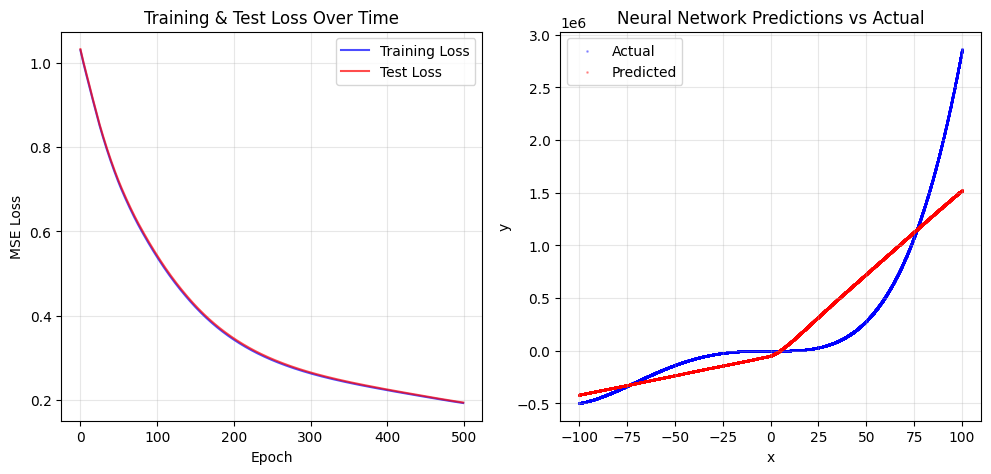

In [12]:
# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
# plt.subplot(1, 3, 3)
# residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
# plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Analysis')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SPECIFIC PREDICTION TEST

In [13]:

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")




PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 1,371,770.99
Ground Truth (formula):    2,015,133.12
Absolute Error:            643,362.13
Relative Error:            31.927%


# PERFORMANCE METRICS

In [14]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.192076
Final Test Loss:     0.193283
R² Score:           0.8086
Total Epochs Run:   500


# PART B: HYPERPARAMETER EXPERIMENTATION

## As required by the assignment, conduct at least 4 experiments with different hyperparameters and log the results

In [15]:
# Initialize results table for hyperparameter experiments
import pandas as pd

# Create results table
results_table = []

print("="*80)
print("PART B: HYPERPARAMETER EXPERIMENTATION")
print("="*80)
print("Conducting 4+ experiments with different hyperparameters...")
print("Each experiment will be logged in the results table below.")
print("-"*80)

PART B: HYPERPARAMETER EXPERIMENTATION
Conducting 4+ experiments with different hyperparameters...
Each experiment will be logged in the results table below.
--------------------------------------------------------------------------------


In [16]:
# Function to run experiment and log results
def run_hyperparameter_experiment(experiment_name, lr, h1, h2, epochs=200):
    """
    Run a single hyperparameter experiment and return results
    """
    print(f"\n🔬 Running Experiment: {experiment_name}")
    print(f"   Learning Rate: {lr}")
    print(f"   Architecture: 1 → {h1} → {h2} → 1")

    # Save original globals and apply experiment-specific settings
    global learning_rate, hidden1, hidden2
    orig_lr, orig_h1, orig_h2 = learning_rate, hidden1, hidden2
    learning_rate, hidden1, hidden2 = lr, h1, h2

    try:
        # Train model with current hyperparameters
        weights, train_losses, test_losses = train_neural_network(
            X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
            epochs=epochs, patience=15
        )

        # Compute final metrics
        final_train_loss = train_losses[-1] if train_losses else float("inf")
        final_test_loss = test_losses[-1] if test_losses else float("inf")

        # Extract weights for predictions
        W1, b1, W2, b2, W3, b3 = weights
        _, _, _, _, Y_pred = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

        # Transform back to original scale
        Y_pred_orig = scaler_Y.inverse_transform(Y_pred)
        ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
        ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        # Log experiment results
        result = {
            "Experiment": experiment_name,
            "Learning_Rate": lr,
            "Hidden1_Neurons": h1,
            "Hidden2_Neurons": h2,
            "Final_Train_Loss": round(final_train_loss, 6),
            "Final_Test_Loss": round(final_test_loss, 6),
            "R2_Score": round(r2, 4),
            "Total_Epochs": len(train_losses),
            "Convergence": "Early Stop" if len(train_losses) < epochs else "Max Epochs",
        }

        print(f"   ✅ Completed - Test Loss: {final_test_loss:.6f}, R²: {r2:.4f}")
        return result

    except Exception as e:
        print(f"   ❌ Failed: {e}")
        return None

    finally:
        # Restore original globals
        learning_rate, hidden1, hidden2 = orig_lr, orig_h1, orig_h2


## Experiment 1: Baseline (Current Configuration)

In [37]:
# Log Experiment 1: Baseline (previous successful run)
exp1_result = {
    "Experiment": "Exp 1: Baseline",
    "Learning_Rate": learning_rate,
    "Hidden1_Neurons": hidden1,
    "Hidden2_Neurons": hidden2,
    "Final_Train_Loss": round(final_train_loss, 6),
    "Final_Test_Loss": round(final_test_loss, 6),
    "R2_Score": round(r2_score, 4),
    "Total_Epochs": len(train_losses),
    "Convergence": "Max Epochs"
}

results_table.append(exp1_result)
print("✅ Baseline Experiment (Exp 1) successfully logged.")
print(exp1_result)


✅ Baseline Experiment (Exp 1) successfully logged.
{'Experiment': 'Exp 1: Baseline', 'Learning_Rate': 0.003, 'Hidden1_Neurons': 96, 'Hidden2_Neurons': 96, 'Final_Train_Loss': np.float64(0.192076), 'Final_Test_Loss': np.float64(0.193283), 'R2_Score': np.float64(0.8086), 'Total_Epochs': 500, 'Convergence': 'Max Epochs'}


## Experiment 2: Higher Learning Rate

In [20]:
# Experiment 2: Try a higher learning rate
exp2_result = run_hyperparameter_experiment(
    "Exp 2: Higher LR",   # experiment_name
    0.01,                 # learning_rate_exp
    64,                   # hidden1_exp
    64,                   # hidden2_exp
    200                   # epochs
)

if exp2_result is not None:
    results_table.append(exp2_result)



🔬 Running Experiment: Exp 2: Higher LR
   Learning Rate: 0.01
   Architecture: 1 → 64 → 64 → 1
Starting training...
Architecture: 1 → 64 → 64 → 1
Learning Rate: 0.01
Max Epochs: 200, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss = 0.678222, Test Loss = 0.674789
Epoch  40: Train Loss = 0.491724, Test Loss = 0.491175
Epoch  60: Train Loss = 0.377537, Test Loss = 0.378310
Epoch  80: Train Loss = 0.312124, Test Loss = 0.313465
Epoch 100: Train Loss = 0.273863, Test Loss = 0.275140
Epoch 120: Train Loss = 0.245091, Test Loss = 0.246004
Epoch 140: Train Loss = 0.217509, Test Loss = 0.218093
Epoch 160: Train Loss = 0.196668, Test Loss = 0.197430
Epoch 180: Train Loss = 0.181189, Test Loss = 0.181844
Epoch 200: Train Loss = 0.167579, Test Loss = 0.168203
   ✅ Completed - Test Loss: 0.168203, R²: 0.8335


## Experiment 3: Smaller Network Architecture

In [23]:
# Experiment 3: Test smaller network architecture
result_3 = run_hyperparameter_experiment(
    "Exp 3: Smaller Net",  # experiment_name
    0.001,                 # learning_rate_exp
    32,                    # hidden1_exp
    16,                    # hidden2_exp
    200                    # epochs
)

if result_3:
    results_table.append(result_3)



🔬 Running Experiment: Exp 3: Smaller Net
   Learning Rate: 0.001
   Architecture: 1 → 32 → 16 → 1
Starting training...
Architecture: 1 → 32 → 16 → 1
Learning Rate: 0.001
Max Epochs: 200, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss = 1.063985, Test Loss = 1.070196
Epoch  40: Train Loss = 1.027916, Test Loss = 1.034302
Epoch  60: Train Loss = 0.994360, Test Loss = 1.000745
Epoch  80: Train Loss = 0.962298, Test Loss = 0.968659
Epoch 100: Train Loss = 0.931532, Test Loss = 0.937850
Epoch 120: Train Loss = 0.901907, Test Loss = 0.908155
Epoch 140: Train Loss = 0.872910, Test Loss = 0.879058
Epoch 160: Train Loss = 0.844663, Test Loss = 0.850728
Epoch 180: Train Loss = 0.817341, Test Loss = 0.823316
Epoch 200: Train Loss = 0.790919, Test Loss = 0.796790
   ✅ Completed - Test Loss: 0.796790, R²: 0.2111


## Experiment 4: Larger Network Architecture

In [25]:
# Experiment 4: Larger network architecture
exp4_result = run_hyperparameter_experiment(
    "Exp 4: Larger Net",   # experiment_name
    0.001,                 # learning_rate_exp
    128,                   # hidden1_exp
    128,                   # hidden2_exp
    200                    # epochs
)

if exp4_result:
    results_table.append(exp4_result)



🔬 Running Experiment: Exp 4: Larger Net
   Learning Rate: 0.001
   Architecture: 1 → 128 → 128 → 1
Starting training...
Architecture: 1 → 128 → 128 → 1
Learning Rate: 0.001
Max Epochs: 200, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss = 0.958901, Test Loss = 0.965630
Epoch  40: Train Loss = 0.908791, Test Loss = 0.915521
Epoch  60: Train Loss = 0.863120, Test Loss = 0.869853
Epoch  80: Train Loss = 0.822050, Test Loss = 0.828704
Epoch 100: Train Loss = 0.784077, Test Loss = 0.790626
Epoch 120: Train Loss = 0.748921, Test Loss = 0.755326
Epoch 140: Train Loss = 0.716677, Test Loss = 0.723028
Epoch 160: Train Loss = 0.687833, Test Loss = 0.694137
Epoch 180: Train Loss = 0.661808, Test Loss = 0.668060
Epoch 200: Train Loss = 0.638553, Test Loss = 0.644764
   ✅ Completed - Test Loss: 0.644764, R²: 0.3616


## Experiment 5: Lower Learning Rate with Asymmetric Architecture

In [26]:
# Experiment 5: Low LR + Asymmetric architecture
exp5_result = run_hyperparameter_experiment(
    "Exp 5: Low LR + Asymmetric",  # experiment_name
    0.0005,                        # learning_rate_exp (half baseline)
    128,                           # hidden1_exp (larger first layer)
    32,                            # hidden2_exp (smaller second layer)
    300                            # epochs (more due to lower LR)
)

if exp5_result:
    results_table.append(exp5_result)



🔬 Running Experiment: Exp 5: Low LR + Asymmetric
   Learning Rate: 0.0005
   Architecture: 1 → 128 → 32 → 1
Starting training...
Architecture: 1 → 128 → 32 → 1
Learning Rate: 0.0005
Max Epochs: 300, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss = 0.875585, Test Loss = 0.883658
Epoch  40: Train Loss = 0.860705, Test Loss = 0.868795
Epoch  60: Train Loss = 0.846303, Test Loss = 0.854404
Epoch  80: Train Loss = 0.832388, Test Loss = 0.840495
Epoch 100: Train Loss = 0.818988, Test Loss = 0.827095
Epoch 120: Train Loss = 0.806071, Test Loss = 0.814163
Epoch 140: Train Loss = 0.793512, Test Loss = 0.801577
Epoch 160: Train Loss = 0.781266, Test Loss = 0.789301
Epoch 180: Train Loss = 0.769333, Test Loss = 0.777337
Epoch 200: Train Loss = 0.757701, Test Loss = 0.765667
Epoch 220: Train Loss = 0.746360, Test Loss = 0.754289
Epoch 240: Train Loss = 0.735205, Test Loss = 0.743091
Epoch 260: Train Loss = 0.724195, Test Loss = 0.732036
Epoch 

## HYPERPARAMETER EXPERIMENT RESULTS TABLE

In [28]:
# Display comprehensive results table
if results_table:
    df_results = pd.DataFrame(results_table)

    print("\n" + "=" * 100)
    print("HYPERPARAMETER EXPERIMENTS SUMMARY TABLE")
    print("=" * 100)

    # Display the table with nice formatting
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", None)
    pd.set_option("display.max_colwidth", None)

    print(df_results.to_string(index=False))

    # Find best experiment (highest R² score)
    best_experiment = df_results.loc[df_results["R2_Score"].idxmax()]

    print("\n" + "=" * 100)
    print("BEST PERFORMING CONFIGURATION:")
    print("=" * 100)
    print(f"🏆 Best Experiment : {best_experiment['Experiment']}")
    print(f"📈 Best R² Score   : {best_experiment['R2_Score']}")
    print(f"📉 Test Loss       : {best_experiment['Final_Test_Loss']}")
    print(f"🏗️  Architecture    : 1 → {best_experiment['Hidden1_Neurons']} → {best_experiment['Hidden2_Neurons']} → 1")
    print(f"📚 Learning Rate   : {best_experiment['Learning_Rate']}")
    print(f"⏱️  Training        : {best_experiment['Total_Epochs']} epochs ({best_experiment['Convergence']})")

    # Save results to CSV
    output_file = "hyperparameter_experiments.csv"
    df_results.to_csv(output_file, index=False)
    print(f"\n💾 Results saved to '{output_file}'")

else:
    print("❌ No experimental results to display. Please run the experiments above.")



HYPERPARAMETER EXPERIMENTS SUMMARY TABLE
                Experiment  Learning_Rate  Hidden1_Neurons  Hidden2_Neurons  Final_Train_Loss  Final_Test_Loss  R2_Score  Total_Epochs Convergence
           Exp 1: Baseline         0.0030               96               96          0.192076         0.193283    0.8086           500  Max Epochs
          Exp 2: Higher LR         0.0100               64               64          0.167579         0.168203    0.8335           200  Max Epochs
        Exp 3: Smaller Net         0.0010               32               16          0.790919         0.796790    0.2111           200  Max Epochs
         Exp 4: Larger Net         0.0010              128              128          0.638553         0.644764    0.3616           200  Max Epochs
Exp 5: Low LR + Asymmetric         0.0005              128               32          0.702710         0.710461    0.2966           300  Max Epochs

BEST PERFORMING CONFIGURATION:
🏆 Best Experiment : Exp 2: Higher LR
📈 Best 